# Introducción a Filtros Convolucionales, Padding, Stride y Pooling en Redes Neuronales Convolucionales

Las redes neuronales convolucionales (CNN) son una clase de redes neuronales profundas que han demostrado un rendimiento excepcional en tareas de visión por computadora. En este tutorial, exploraremos los conceptos fundamentales de los filtros convolucionales, padding, stride y pooling, intercalando explicaciones teóricas con ejemplos prácticos en Python. Utilizaremos librerías como NumPy, Matplotlib y SciPy para ilustrar cómo estos conceptos afectan a las imágenes en diferentes escenarios.

## Índice

1. [Convolución y Filtros Convolucionales](#convolucion)
2. [Aplicación de Filtros en Python](#aplicacion-filtros)
3. [Padding](#padding)
4. [Stride](#stride)
5. [Pooling y Max Pooling](#pooling)
6. [Conclusión](#conclusion)

<a id="convolucion"></a>
## 1. Convolución y Filtros Convolucionales

### ¿Qué es la Convolución?

La **convolución** es una operación matemática que combina dos funciones para producir una tercera función. En el contexto de procesamiento de imágenes, se utiliza para aplicar filtros que resaltan características específicas de una imagen, como bordes, esquinas o texturas.

Matemáticamente, la convolución discreta en 2D se define como:

$$
G(i, j) = (I * K)(i, j) = \sum_m \sum_n I(i - m, j - n) \cdot K(m, n)
$$

- \( I \) es la imagen de entrada.
- \( K \) es el kernel o filtro.
- \( G \) es la imagen resultante.

### Filtros Convolucionales

Un **filtro convolucional** o **kernel** es una matriz pequeña (por ejemplo, \( 3 \times 3 \)) que se desliza sobre la imagen de entrada para realizar operaciones específicas.

#### Ejemplo de Filtro de Detección de Bordes

Un filtro común es el filtro Sobel, utilizado para la detección de bordes horizontales:

$$
K = \begin{pmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \\
\end{pmatrix}
$$

Este filtro resalta los cambios bruscos en la intensidad de los píxeles, que corresponden a los bordes horizontales en una imagen.

<a id="aplicacion-filtros"></a>
## 2. Aplicación de Filtros en Python

### Importar Librerías Necesarias



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from scipy import ndimage


### Cargar y Mostrar la Imagen Original

Utilizaremos una imagen de ejemplo proporcionada por `skimage`.



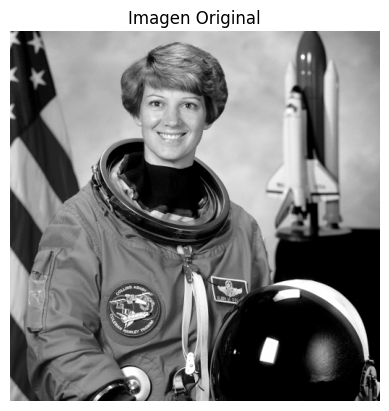

In [2]:
# Cargar una imagen en escala de grises
image = color.rgb2gray(data.astronaut())

# Mostrar la imagen original
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()



### Aplicar el Filtro Convolucional

Ahora, aplicaremos el filtro Sobel a la imagen para detectar los bordes horizontales.



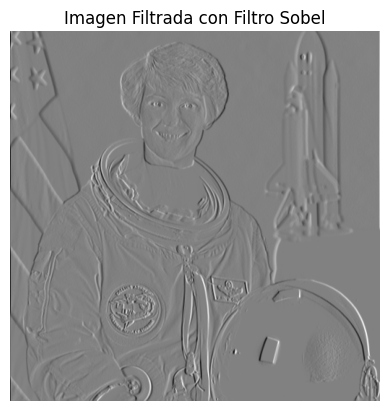

In [3]:
# Definir el filtro Sobel horizontal
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# Aplicar la convolución
# OJO -> ndimage.convolve te hace un padding de 1 siempre!!!!!!!!
filtered_image = ndimage.convolve(image, kernel, mode='constant')

# Mostrar la imagen filtrada
plt.imshow(filtered_image, cmap='gray')
plt.title('Imagen Filtrada con Filtro Sobel')
plt.axis('off')
plt.show()


La imagen resultante resalta los bordes horizontales. Las áreas donde hay cambios bruscos en la intensidad (como los contornos de objetos) aparecen más claras, mientras que las áreas uniformes se ven oscuras. Esto es útil en aplicaciones donde necesitamos detectar los límites de los objetos en una imagen.

<a id="padding"></a>
## 3. Padding

### ¿Qué es el Padding?

El **padding** consiste en agregar píxeles adicionales alrededor de la imagen. Esto se hace para controlar el tamaño de la salida después de la convolución y para preservar la información en los bordes.

- **Sin Padding:** La dimensión de la imagen resultante es menor que la original.
- **Con Padding:** Podemos mantener o controlar el tamaño de la imagen resultante.

### Efecto del Padding en la Convolución

Implementaremos una función para aplicar convolución con padding opcional.



In [4]:
def convolve_with_padding(image, kernel, padding=0):
    # Agregar padding a la imagen
    if padding > 0:
        image_padded = np.pad(image, pad_width=padding, mode='constant', constant_values=0)
    else:
        image_padded = image
    # Aplicar convolución
    return ndimage.convolve(image_padded, kernel)


#### Generar una Imagen Sencilla para Comparación

A partir de aquí, utilizaremos una imagen generada de tamaño 10x10 para facilitar la comparación de padding y stride.



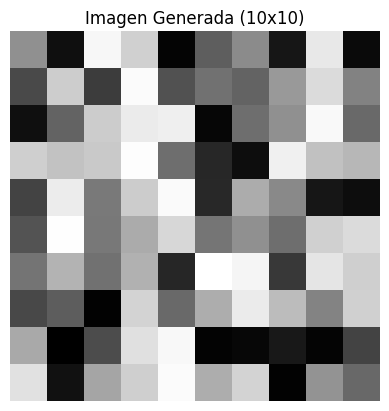

In [5]:
# Generar una imagen sencilla de 10x10
image = np.random.randint(0, 255, (10, 10))

# Mostrar la imagen generada
plt.imshow(image, cmap='gray')
plt.title('Imagen Generada (10x10)')
plt.axis('off')
plt.show()


#### Aplicar Convolución con y sin padding (aunque la función ya aplica por defecto un padding de 1...)

In [6]:
# Sin Padding
filtered_no_padding = convolve_with_padding(image, kernel, padding=0)

# Con Padding
filtered_with_padding = convolve_with_padding(image, kernel, padding=1)


#### Comparar Resultados



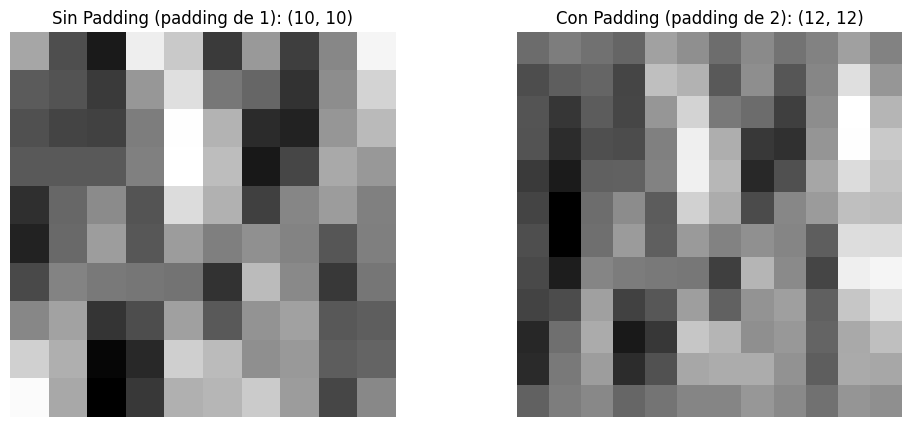

In [7]:
# Mostrar resultados
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(filtered_no_padding, cmap='gray')
axs[0].set_title(f'Sin Padding (padding de 1): {filtered_no_padding.shape}')
axs[0].axis('off')

axs[1].imshow(filtered_with_padding, cmap='gray')
axs[1].set_title(f'Con Padding (padding de 2): {filtered_with_padding.shape}')
axs[1].axis('off')

plt.show()



- **Sin Padding:** La imagen resultante es más pequeña y los bordes se pierden, ya que el filtro no puede aplicarse en las áreas donde no encaja completamente.
- **Con Padding de 1:** La imagen mantiene su tamaño original y los bordes están mejor definidos, ya que el padding permite que el filtro se aplique en los bordes de la imagen.
- **Con Padding de 2:** La imagen es más grande que la original!

<a id="stride"></a>
## 4. Stride

### ¿Qué es el Stride?

El **stride** es el número de píxeles que el filtro se desplaza sobre la imagen de entrada. Un stride mayor reduce el tamaño de la salida y aumenta la eficiencia computacional a costa de perder información detallada.

- **Stride de 1:** El filtro se mueve un píxel a la vez.
- **Stride de 2 o más:** El filtro se mueve saltando píxeles, lo que reduce la resolución de la imagen resultante.

### Implementación de Convolución con Stride



In [8]:
def convolve_with_stride(image, kernel, stride=1):
    output_shape = ((image.shape[0] - kernel.shape[0]) // stride + 1,
                    (image.shape[1] - kernel.shape[1]) // stride + 1)
    output = np.zeros(output_shape)
    for i in range(0, output.shape[0]):
        for j in range(0, output.shape[1]):
            region = image[i*stride:i*stride+kernel.shape[0], j*stride:j*stride+kernel.shape[1]]
            output[i, j] = np.sum(region * kernel)
    return output


### Aplicar Convolución con Diferentes Strides

In [9]:
# Stride de 1
filtered_stride_1 = convolve_with_stride(image, kernel, stride=1)

# Stride de 2
filtered_stride_2 = convolve_with_stride(image, kernel, stride=2)



### Comparar Resultados



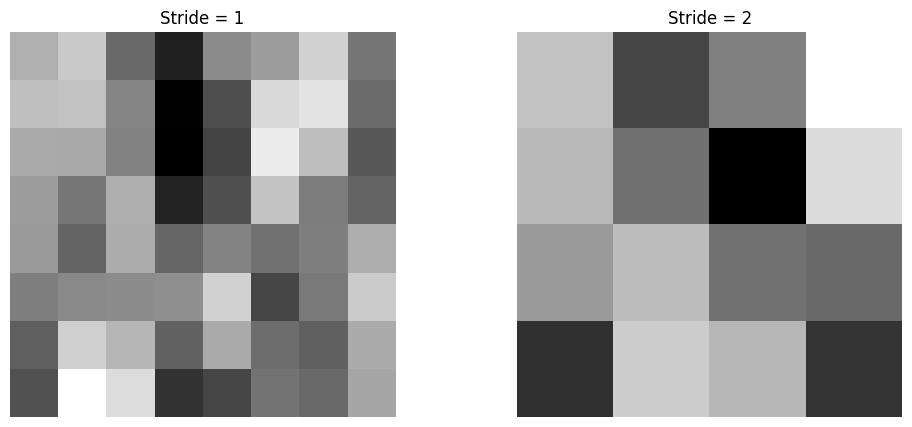

In [10]:
# Mostrar resultados
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(filtered_stride_1, cmap='gray')
axs[0].set_title('Stride = 1')
axs[0].axis('off')

axs[1].imshow(filtered_stride_2, cmap='gray')
axs[1].set_title('Stride = 2')
axs[1].axis('off')

plt.show()


- **Stride = 1:** La imagen resultante mantiene más detalles, ya que el filtro se aplica en cada posición posible.
- **Stride = 2:** La imagen es más pequeña y menos detallada. Esto puede ser útil para reducir la dimensionalidad y la carga computacional, pero puede perderse información importante. Lo normal es usar pooling para reducir la dimensión

<a id="pooling"></a>
## 5. Pooling y Max Pooling

### ¿Qué es el Pooling?

El **pooling** es una técnica para reducir la dimensionalidad de la representación, manteniendo las características más importantes. Ayuda a controlar el overfitting y reduce la complejidad computacional.

- **Max Pooling:** Selecciona el valor máximo dentro de una ventana.
- **Average Pooling:** Calcula el promedio de los valores dentro de una ventana.

### Implementación de Max Pooling

In [11]:
def max_pooling(image, pool_size=2, stride=2):
    output_shape = ((image.shape[0] - pool_size) // stride + 1,
                    (image.shape[1] - pool_size) // stride + 1)
    output = np.zeros(output_shape)
    for i in range(0, output.shape[0]):
        for j in range(0, output.shape[1]):
            region = image[i*stride:i*stride+pool_size, j*stride:j*stride+pool_size]
            output[i, j] = np.max(region)
    return output



### Aplicar Max Pooling a la Imagen Generada



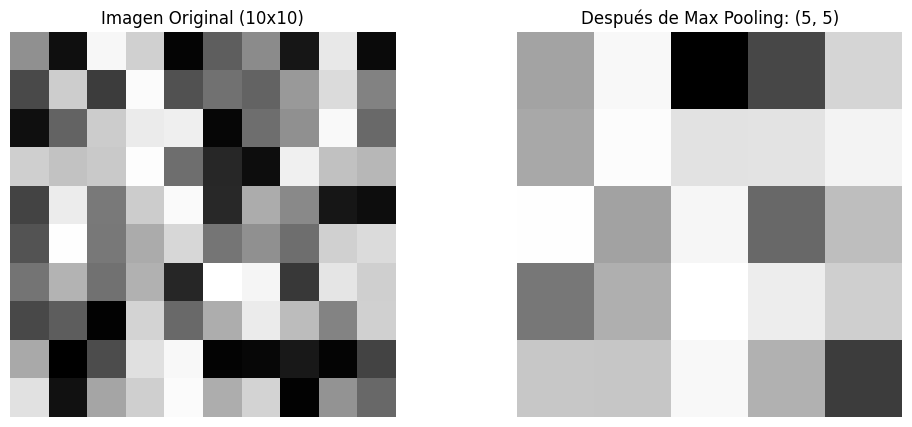

In [12]:
# Aplicar max pooling
pooled_image = max_pooling(image, pool_size=2, stride=2)

# Mostrar imagen original y después de pooling
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Imagen Original (10x10)')
axs[0].axis('off')

axs[1].imshow(pooled_image, cmap='gray')
axs[1].set_title(f'Después de Max Pooling: {pooled_image.shape}')
axs[1].axis('off')

plt.show()


La imagen después del max pooling es de menor resolución y tamaño. Sin embargo, las características más prominentes se mantienen. 
El pooling reduce la dimensionalidad y puede hacer que el modelo sea más robusto a pequeñas variaciones en la posición de las características.

### Combinación de Convolución y Pooling

Ahora, aplicaremos un filtro convolucional seguido de max pooling para ver cómo se combinan estas operaciones.

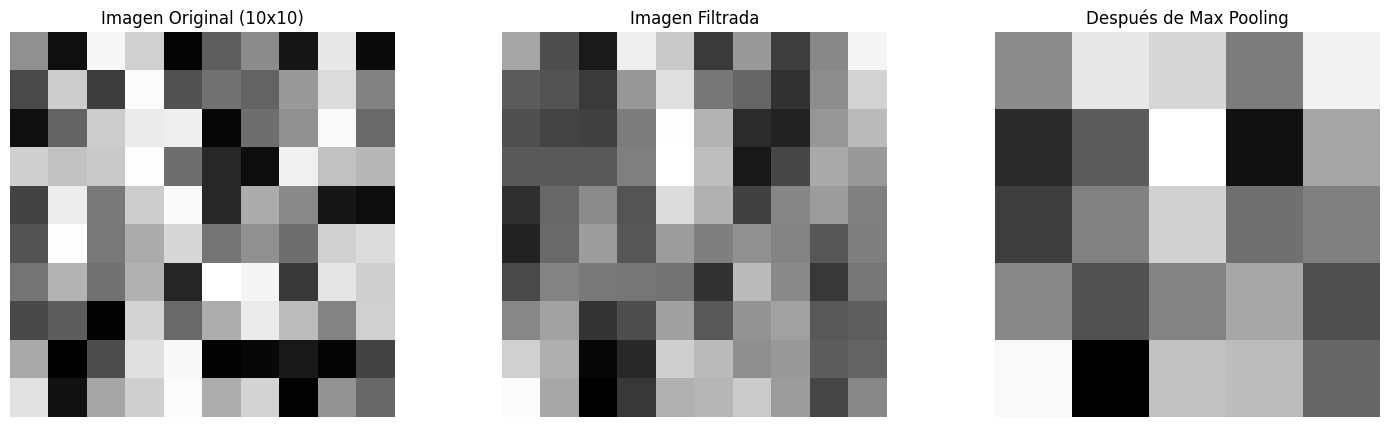

In [13]:
# Aplicar filtro convolucional
filtered_image = ndimage.convolve(image, kernel)

# Aplicar max pooling al resultado de la convolución
pooled_filtered_image = max_pooling(filtered_image, pool_size=2, stride=2)

# Mostrar resultados
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Imagen Original (10x10)')
axs[0].axis('off')

axs[1].imshow(filtered_image, cmap='gray')
axs[1].set_title('Imagen Filtrada')
axs[1].axis('off')

axs[2].imshow(pooled_filtered_image, cmap='gray')
axs[2].set_title('Después de Max Pooling')
axs[2].axis('off')

plt.show()


- **Imagen Filtrada:** Después de aplicar el filtro Sobel, la imagen resalta los bordes horizontales.
- **Después de Max Pooling:** La imagen es más pequeña y menos detallada, pero las características clave (los bordes detectados) se mantienen. Esto demuestra cómo la combinación de convolución y pooling puede extraer características importantes mientras reduce la dimensionalidad de los datos.

<a id="conclusion"></a>
## 6. Conclusión

En este tutorial, hemos explorado los conceptos fundamentales de los filtros convolucionales, padding, stride y pooling, y cómo afectan a las imágenes en diferentes escenarios. A través de ejemplos prácticos en Python, hemos visto:

- **Filtros Convolucionales:** Cómo aplicar kernels para extraer características específicas de una imagen.
- **Padding:** Cómo afecta el tamaño de la imagen resultante y la preservación de información en los bordes.
- **Stride:** Cómo controlar el desplazamiento del filtro para reducir la resolución de la imagen resultante.
- **Pooling:** Cómo reducir la dimensionalidad de la representación manteniendo las características más importantes.

Estos conceptos son esenciales en el diseño y comprensión de redes neuronales convolucionales utilizadas en tareas de visión por computadora, como clasificación de imágenes, detección de objetos y segmentación.
